# Scroll down for EDA on mental health providers

In [76]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
death_df = pd.read_csv("data/OpioidDeaths_2020.txt", sep="\t")
death_df = death_df.drop(columns="Notes")
death_df.shape

(989, 5)

In [78]:
death_df.isna().sum()

County         70
County Code    70
Deaths         69
Population     69
Crude Rate     69
dtype: int64

In [79]:
# drop rows with null values
death_df = death_df.dropna()

In [80]:
death_df.shape

(919, 5)

In [81]:
death_df[death_df['Crude Rate']=='Unreliable'].shape

(330, 5)

In [82]:
# Counties with highest opioid death rate
death_df = death_df[death_df['Crude Rate'] != 'Unreliable']
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)
death_df.sort_values(by='Crude Rate', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
878,"McDowell County, WV",54047.0,27.0,16916.0,159.6
877,"Logan County, WV",54045.0,44.0,31688.0,138.9
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
621,"Scioto County, OH",39145.0,95.0,74347.0,127.8
868,"Cabell County, WV",54011.0,112.0,91589.0,122.3
888,"Raleigh County, WV",54081.0,86.0,72920.0,117.9
890,"Wayne County, WV",54099.0,46.0,39054.0,117.8
840,"Petersburg city, VA",51730.0,33.0,30446.0,108.4
727,"Cheatham County, TN",47021.0,39.0,41101.0,94.9
411,"St. Louis city, MO",29510.0,270.0,297645.0,90.7


In [83]:
# Counties with highest number of opioid deaths
death_df.sort_values(by='Deaths', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
175,"Cook County, IL",17031.0,1662.0,5108284.0,32.5
40,"Los Angeles County, CA",6037.0,1342.0,9943046.0,13.5
16,"Maricopa County, AZ",4013.0,1255.0,4579081.0,27.4
683,"Philadelphia County, PA",42101.0,913.0,1578487.0,57.8
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
589,"Franklin County, OH",39049.0,747.0,1324624.0,56.4
374,"Wayne County, MI",26163.0,710.0,1740623.0,40.8
648,"Allegheny County, PA",42003.0,569.0,1211358.0,47.0
95,"Broward County, FL",12011.0,555.0,1958105.0,28.3
51,"San Diego County, CA",6073.0,535.0,3332427.0,16.1


In [84]:
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

In [85]:
# Creating dataframe with only county and RUCC columns
rucc_df = sdoh_df[['COUNTYFIPS', 'AHRF_USDA_RUCC_2013']]
rucc_df.loc[:, 'COUNTYFIPS'] = rucc_df['COUNTYFIPS'].astype(float)
rucc_df = rucc_df.dropna()

# RUCC codes 4-9 are typically considered rural
rucc_df['Rural'] = rucc_df['AHRF_USDA_RUCC_2013'].apply(lambda x: 'Rural' if x >= 4 else 'Urban')
rucc_df

,COUNTYFIPS,AHRF_USDA_RUCC_2013,Rural
0,1001,2.0,Urban
1,1003,3.0,Urban
2,1005,6.0,Rural
3,1007,1.0,Urban
4,1009,1.0,Urban
...,...,...,...
3221,72145,1.0,Urban
3222,72147,7.0,Rural
3223,72149,2.0,Urban
3224,72151,1.0,Urban


Text(0, 0.5, 'Opioid Death Rate (per 100,000)')

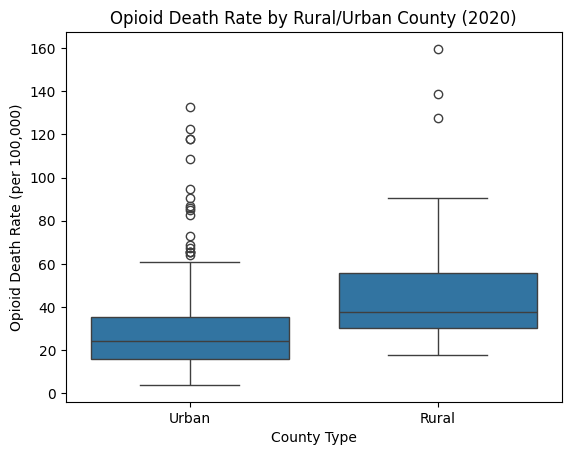

In [86]:
# Creating merged df with death and RUCC data
rucc_death_df = death_df.merge(rucc_df, left_on='County Code', right_on='COUNTYFIPS', how='left')

sns.boxplot(x="Rural", y="Crude Rate", data=rucc_death_df)
plt.title("Opioid Death Rate by Rural/Urban County (2020)")
plt.xlabel("County Type")
plt.ylabel("Opioid Death Rate (per 100,000)")

In [87]:
# descriptive statistics for opioid death rate by rural/urban county
rucc_death_df.groupby('Rural')['Crude Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Rural,,,,,,,,
Rural,63.0,46.776190,27.682105,17.8,30.5,37.7,55.55,159.6
Urban,526.0,27.930418,17.512097,3.9,16.1,24.1,35.25,132.6


# BELOW IS MENTAL HEALTH PROVIDERS EDA

In [92]:
mental_health_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY',
                            'AMFAR_MEDSAFAC_RATE']]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
1447,28089,Mississippi,Madison County,0.0000
199,6023,California,Humboldt County,0.0445
484,13193,Georgia,Macon County,0.0000
1665,31019,Nebraska,Buffalo County,0.0200
460,13145,Georgia,Harris County,0.0000


In [93]:
mental_health_df.isnull().sum()

COUNTYFIPS             0
STATE                  0
COUNTY                 0
AMFAR_MEDSAFAC_RATE    9
dtype: int64

In [94]:
mental_health_df = mental_health_df.dropna(subset=['AMFAR_MEDSAFAC_RATE'])
mental_health_df.COUNTYFIPS = mental_health_df.COUNTYFIPS.astype(float)

In [95]:
death_mental_df = death_df.merge(mental_health_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
35,"Sacramento County, CA",6067.0,109.0,1559146.0,7.0,6067.0,California,Sacramento County,0.0083
283,"Essex County, NJ",34013.0,269.0,800501.0,33.6,34013.0,New Jersey,Essex County,0.0375
582,"Racine County, WI",55101.0,49.0,195802.0,25.0,55101.0,Wisconsin,Racine County,0.0204
233,"Ingham County, MI",26065.0,105.0,290609.0,36.1,26065.0,Michigan,Ingham County,0.0310
117,"Douglas County, GA",13097.0,26.0,147988.0,17.6,13097.0,Georgia,Douglas County,0.0068


Text(0, 0.5, 'Opioid Overdose Death Rate per 100k People')

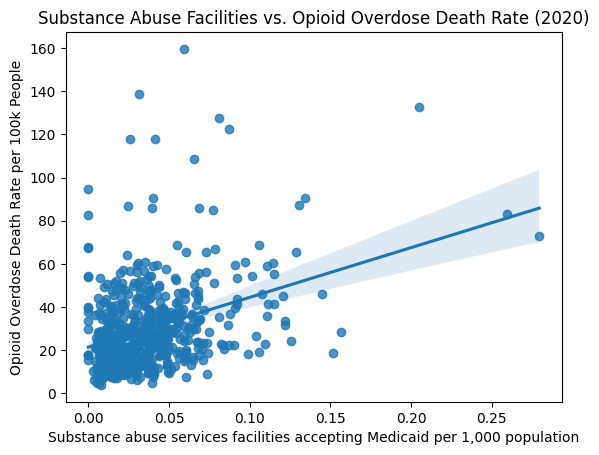

In [97]:
sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


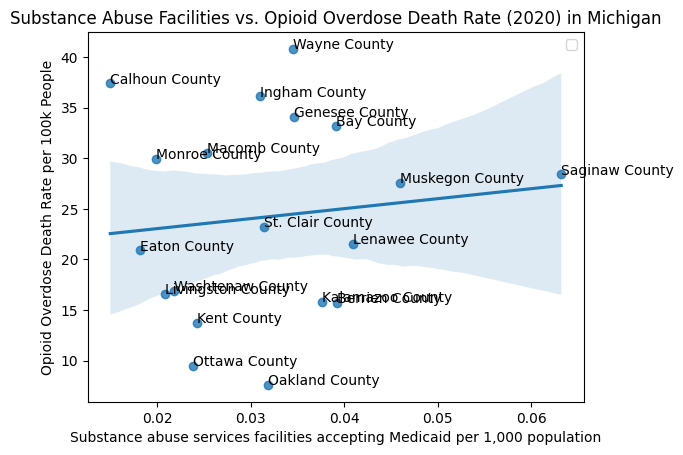

In [98]:
michigan_df = death_mental_df[death_mental_df.STATE == 'Michigan']

sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=michigan_df)

for i in range(len(michigan_df)):
    plt.text(michigan_df['AMFAR_MEDSAFAC_RATE'].iloc[i], michigan_df['Crude Rate'].iloc[i], michigan_df['COUNTY'].iloc[i])

plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020) in Michigan')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')
plt.legend()


In [100]:
pov_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'SAIPE_PCT_POV']].copy()
pov_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV
3131,56021,Wyoming,Laramie County,7.4
1202,24017,Maryland,Charles County,7.4
346,12051,Florida,Hendry County,22.9
2135,40005,Oklahoma,Atoka County,18.6
250,8009,Colorado,Baca County,16.9


In [103]:
pov_df = pov_df.dropna(subset=['SAIPE_PCT_POV'])
pov_df.loc[:, 'COUNTYFIPS'] = pov_df.COUNTYFIPS.astype(float)

In [104]:
pov_df.SAIPE_PCT_POV.describe()

count    3142.000000
mean       13.735360
std         5.422366
min         3.000000
25%         9.900000
50%        12.800000
75%        16.600000
max        43.900000
Name: SAIPE_PCT_POV, dtype: float64

In [105]:
pov_df['pov_cat'] = np.where(pov_df['SAIPE_PCT_POV'] <= 9.9, 'low', np.where(pov_df['SAIPE_PCT_POV'] >= 16.7, 'high', 'medium'))

In [106]:
death_pov_df = death_df.merge(pov_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_pov_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV,pov_cat
501,"Dallas County, TX",48113.0,234.0,2635888.0,8.9,48113.0,Texas,Dallas County,13.7,medium
146,"Grant County, IN",18053.0,27.0,65225.0,41.4,18053.0,Indiana,Grant County,16.7,high
275,"Rockingham County, NH",33015.0,70.0,311307.0,22.5,33015.0,New Hampshire,Rockingham County,4.6,low
292,"Salem County, NJ",34033.0,32.0,62451.0,51.2,34033.0,New Jersey,Salem County,12.2,medium
318,"Onondaga County, NY",36067.0,137.0,459214.0,29.8,36067.0,New York,Onondaga County,12.8,medium


Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

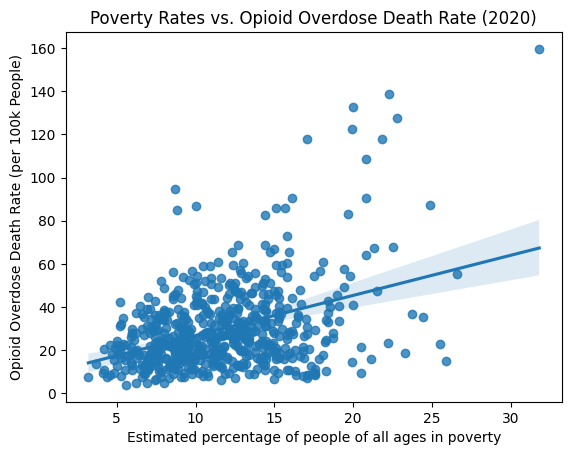

In [108]:
sns.regplot(x='SAIPE_PCT_POV', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Estimated percentage of people of all ages in poverty')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100,000)')

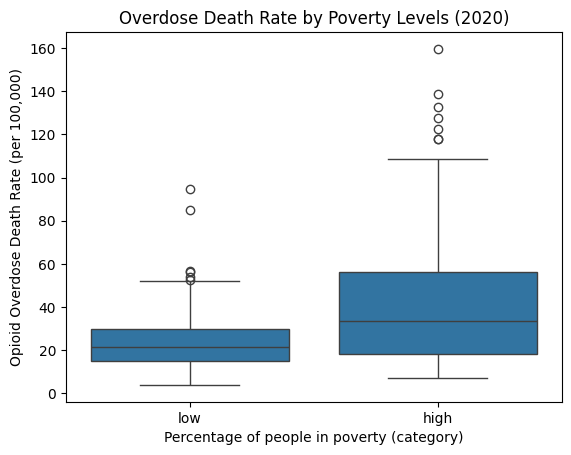

In [109]:
# Filter the data for low and high pov_cat
filtered_data = death_pov_df[death_pov_df['pov_cat'].isin(['low', 'high'])]

# Create the side-by-side boxplots
sns.boxplot(x='pov_cat', y='Crude Rate', data=filtered_data)
plt.title('Overdose Death Rate by Poverty Levels (2020)')
plt.xlabel('Percentage of people in poverty (category)')
plt.ylabel('Opioid Overdose Death Rate (per 100,000)')
